In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
haberman_ds = pd.read_csv("haberman.csv")

In [3]:
haberman_ds

,Age,Year of Operation,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


### Overview:

* The Haberman's Cancer Survival Data-set contains the record of survival status of the patient's who had undergone surgery for breast cancer during the years 1958-1970 at the University of Chicago's Billings Hospital.

In [4]:
############################################################################

## 1.1 High-level Statistics of the Data Set

### 1) Number of Data-points

In [5]:
haberman_ds.shape

(306, 4)

* The dataset contains 306 number of patient record's with each row representing individual patient statistics. Thus, the number of data-points is 306. 

### 2) Number of Features

In [6]:
haberman_ds.columns

Index(['Age', 'Year of Operation', 'Axillary Nodes', 'Survival Status'], dtype='object')

* The data-set contains 3 features corresponding to each patient, which are:

1) Age of the patient ('Age')        
2) Year of operation ('Year of operation')     
3) Number of positive axillary nodes detected ('Axillary Nodes')

### 3) Number of Classes

* The data-set contains the Class-label 'Survival Status' which means whether the patient had survived or not after undergoing the surgery.

There are 2 class-labels:    

1) 1 = the patient survived 5 years or longer after the surgery    
2) 2 = the patient died within 5 years of surgery

### 4) Data-points per class

In [7]:
haberman_ds['Survival Status'].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

* The number of data-points corresponding to each class:

1) Class-label '1': 225 data-points         
2) Class-label '2': 81 data-points

### Observation(s):
* It is an imbalanced dataset since the difference between number of data-points for two class labels is comparatively significant/huge.
* Mathematically speaking, class-label '1' is almost thrice the number of class-label '2'.

In [8]:
############################################################################

## 1.2 Objective

* The problem statement here is Classification, that is, we have to classify/predict whether the patient who had undergone the surgery for breast cancer will survive for 5 years or longer (Class-label '1'), or the patient will die within five years post-operation (Class-label '2').

In [9]:
############################################################################

## 1.3 Uni-Variate Analysis

In [10]:
# Dividing the haberman data-set into two different dataframe's based on 
# class-labels

haberman_ds_survived = haberman_ds.loc[haberman_ds["Survival Status"] == 1];
haberman_ds_died = haberman_ds.loc[haberman_ds["Survival Status"] == 2];

In [11]:
haberman_ds_survived

,Age,Year of Operation,Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
298,73,68,0,1
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1


In [12]:
haberman_ds_died

,Age,Year of Operation,Axillary Nodes,Survival Status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2
...,...,...,...,...
286,70,58,4,2
293,72,63,0,2
299,74,65,3,2
304,78,65,1,2


## 1-D Scatter Plot's

### 1) Age

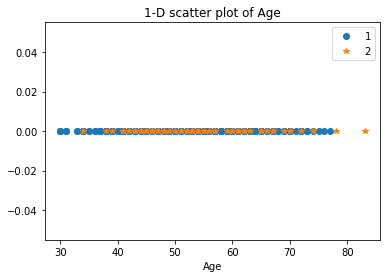

In [13]:
plt.plot(haberman_ds_survived["Age"], np.zeros_like(haberman_ds_survived["Age"]), 'o')
plt.plot( haberman_ds_died["Age"], np.zeros_like(haberman_ds_died["Age"]), '*')
plt.title('1-D scatter plot of Age')
plt.xlabel('Age')
plt.legend(['1', '2'])
plt.show()

### Observation(s):  

* Cannot distinguish between two class-labels because of multiple data-points at each value of age (on x-axis).

### 2) Year of Operation

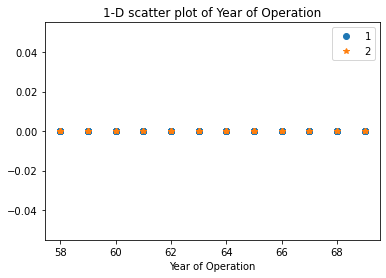

In [14]:
plt.plot(haberman_ds_survived["Year of Operation"], np.zeros_like(haberman_ds_survived["Year of Operation"]), 'o')
plt.plot( haberman_ds_died["Year of Operation"], np.zeros_like(haberman_ds_died["Year of Operation"]), '*')
plt.title('1-D scatter plot of Year of Operation')
plt.xlabel('Year of Operation')
plt.legend(['1', '2'])
plt.show()

### Observation(s):    

* Overlap of data-points belonging to two class-labels. No chance of differentiating.

### 3) Axillary Nodes

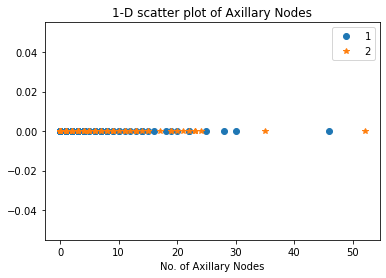

In [15]:
plt.plot(haberman_ds_survived["Axillary Nodes"], np.zeros_like(haberman_ds_survived["Axillary Nodes"]), 'o')
plt.plot( haberman_ds_died["Axillary Nodes"], np.zeros_like(haberman_ds_died["Axillary Nodes"]), '*')
plt.title('1-D scatter plot of Axillary Nodes')
plt.xlabel('No. of Axillary Nodes')
plt.legend(['1', '2'])
plt.show()

### Observation(s):    

* Massive overlap of data-points. No chance of differentiating. 

In [16]:
############################################################################

## Histogram & Probability Density Function (PDF)

### 1) Age

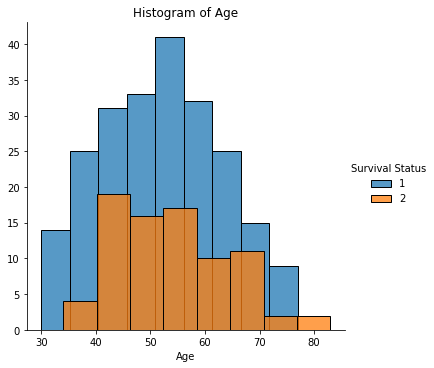

In [17]:
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(sns.histplot, "Age") \
   .add_legend();
plt.title('Histogram of Age')
plt.show();

C:\Users\rakeshbangla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rakeshbangla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


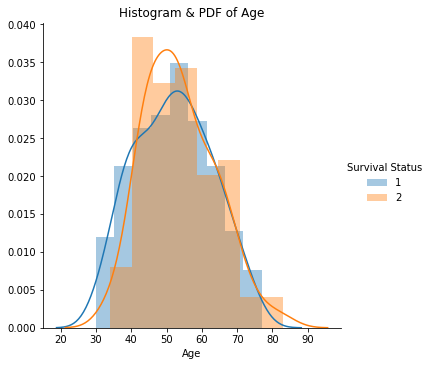

In [18]:
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title('Histogram & PDF of Age')
plt.show();

### Observation(s):    
* Huge Overlap of data-points. Class-label's cannot be separated.

### 2) Year of Operation

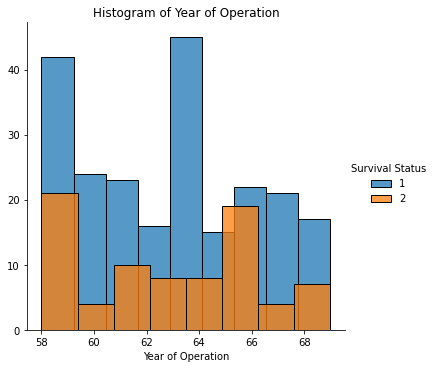

In [19]:
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(sns.histplot, "Year of Operation") \
   .add_legend();
plt.title('Histogram of Year of Operation')
plt.show();

C:\Users\rakeshbangla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rakeshbangla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


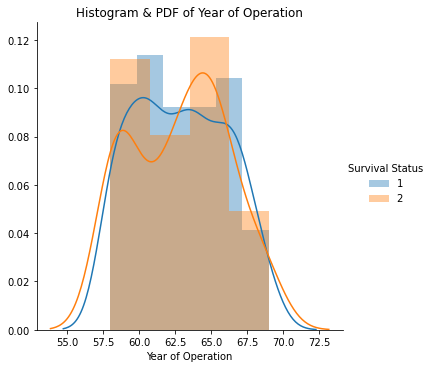

In [20]:
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(sns.distplot, "Year of Operation") \
   .add_legend();
plt.title('Histogram & PDF of Year of Operation')
plt.show();

### Observation(s):    
* Massive Overlap of data-points. Class-label's cannot be separated.

### 3) Number of Axillary Nodes

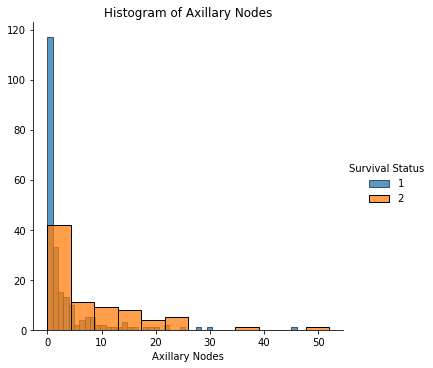

In [21]:
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(sns.histplot, "Axillary Nodes") \
   .add_legend();
plt.title('Histogram of Axillary Nodes')
plt.show();

C:\Users\rakeshbangla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rakeshbangla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


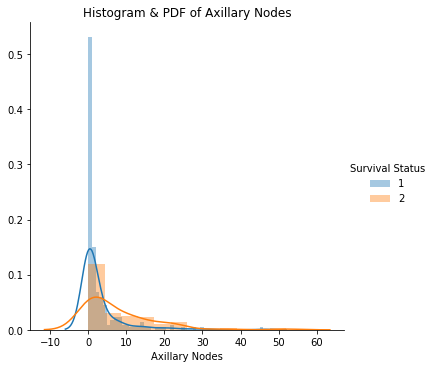

In [22]:
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(sns.distplot, "Axillary Nodes") \
   .add_legend();
plt.title('Histogram & PDF of Axillary Nodes')
plt.show();

### Observation(s):    

* Overlap of data-points. Class-label's cannot be separated.

### Overall Conclusion(s) of Histogram's and PDF's:

* No individual feature is useful for Classification.
* Distinguishing the two-class labels is not possible because of huge over-lap of data-points.
* Histograms & PDF do not help much.

In [23]:
############################################################################

## Cumulative Distribution Function (CDF)

### 1) Age

In [24]:
haberman_ds['Age'].min()

30

In [25]:
haberman_ds['Age'].max()

83

* Calculation of counts and bin edges:   

Age = [30, ......, 83]   

Min = 30   
Max = 83   
Bins = 5   
Width of each bin = (Max - Min)/Bins   
                       = (83-30)/5   
                       = 53/5 = 10.6     
                  
For simplicity, we round it off to 10.    

Note: We can also exclude the only one data-point of age 83, so that the range is between 30 and 80.

[0.14052288 0.32352941 0.31372549 0.19281046 0.02941176]
[30.  40.6 51.2 61.8 72.4 83. ]


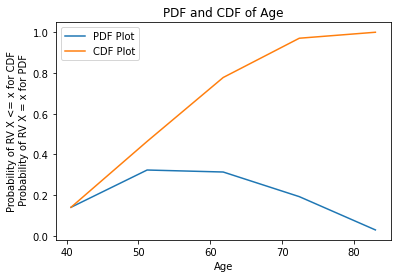

In [26]:
counts, bin_edges = np.histogram(haberman_ds["Age"], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Age')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Age')
plt.show();

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


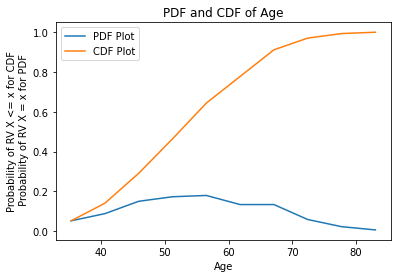

In [27]:
counts, bin_edges = np.histogram(haberman_ds["Age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Age')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Age')
plt.show();

### Observation(s):

* About 80% of total patient's are below the age of 63.

[0.16       0.21777778 0.32888889 0.20444444 0.08888889]
[30.  39.4 48.8 58.2 67.6 77. ]
[0.16049383 0.39506173 0.25925926 0.14814815 0.03703704]
[34.  43.8 53.6 63.4 73.2 83. ]


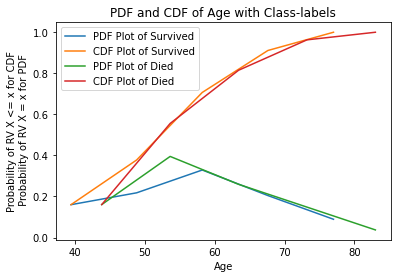

In [28]:
#total

#survived
counts, bin_edges = np.histogram(haberman_ds_survived["Age"], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

#died
counts, bin_edges = np.histogram(haberman_ds_died["Age"], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Age')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot of Survived', 'CDF Plot of Survived',
           'PDF Plot of Died', 'CDF Plot of Died'])
plt.title('PDF and CDF of Age with Class-labels')
plt.show();

### Observation(s):    

* Alot of overlap of PDF's of both classes. Separating them is not possible.

[0.16       0.21777778 0.32888889 0.20444444 0.08888889]
[30.  39.4 48.8 58.2 67.6 77. ]


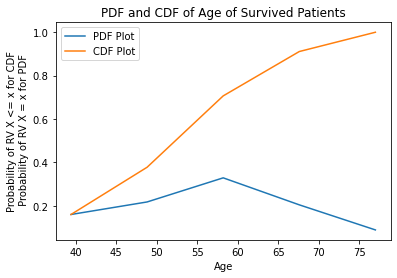

In [29]:
#age of the patient - survived

counts, bin_edges = np.histogram(haberman_ds_survived["Age"], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Age')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Age of Survived Patients')
plt.show();


### Observation(s):    

* 70% of patient's below the age of 58 survived.
* 80% of patient's below the age of 62 survived.
* 50% of patient's who had survived fall between the age group of 49 and 68.

[0.16049383 0.39506173 0.25925926 0.14814815 0.03703704]
[34.  43.8 53.6 63.4 73.2 83. ]


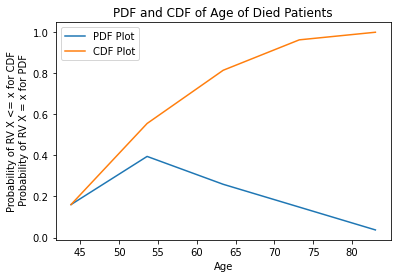

In [30]:
#age of the patient - died

counts, bin_edges = np.histogram(haberman_ds_died["Age"], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Age')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Age of Died Patients')
plt.show();



### Observation(s):     

* 55% of patient's who had died fall below the age of 54.
* 80% of patient's who had died fall below the age of 64.
* 50% of patient's who had died fall between the age group of 50 and 70.

### 2) Year of Operation

In [31]:
haberman_ds['Year of Operation'].min()

58

In [32]:
haberman_ds['Year of Operation'].max()

69

* Calculation of counts and bin edges:   

Year = [58, ......, 69]   

Min = 58   
Max = 69   
Bins = 6   
Width of each bin = (Max - Min)/Bins   
                       = (69-58)/6   
                       = 11/6 = 1.83     
                  
For simplicity, we round it off to 2.    

[0.20588235 0.17647059 0.17320261 0.19281046 0.17320261 0.07843137]
[58.         59.83333333 61.66666667 63.5        65.33333333 67.16666667
 69.        ]


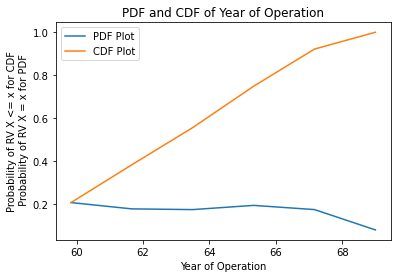

In [33]:
counts, bin_edges = np.histogram(haberman_ds['Year of Operation'], bins=6, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Year of Operation')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Year of Operation')
plt.show();

### Observation(s):

* About 81% of total patient's have undergone operation's between '59 and '66.
* About 60% of total patient's have undergone operation's between '59 and '64.

[0.18666667 0.20888889 0.16888889 0.16888889 0.19111111 0.07555556]
[58.         59.83333333 61.66666667 63.5        65.33333333 67.16666667
 69.        ]
[0.25925926 0.08641975 0.18518519 0.25925926 0.12345679 0.08641975]
[58.         59.83333333 61.66666667 63.5        65.33333333 67.16666667
 69.        ]


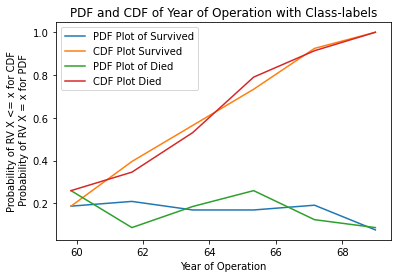

In [34]:
#total

#survived
counts, bin_edges = np.histogram(haberman_ds_survived['Year of Operation'], bins=6, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#died
counts, bin_edges = np.histogram(haberman_ds_died['Year of Operation'], bins=6, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Year of Operation')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot of Survived', 'CDF Plot Survived',
           'PDF Plot of Died', 'CDF Plot Died'])
plt.title('PDF and CDF of Year of Operation with Class-labels')
plt.show();

### Observation(s):    

* Massive overlap between PDF's of both classes. Not much help from the above plot.

[0.18666667 0.20888889 0.16888889 0.16888889 0.19111111 0.07555556]
[58.         59.83333333 61.66666667 63.5        65.33333333 67.16666667
 69.        ]


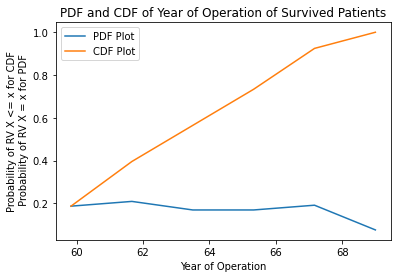

In [35]:
#year of operation

#survived
counts, bin_edges = np.histogram(haberman_ds_survived['Year of Operation'], bins=6, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Year of Operation')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Year of Operation of Survived Patients')
plt.show();

### Observation(s):    

* The data-points of survived patient's are evenly distributed except for the last bin.

[0.25925926 0.08641975 0.18518519 0.25925926 0.12345679 0.08641975]
[58.         59.83333333 61.66666667 63.5        65.33333333 67.16666667
 69.        ]


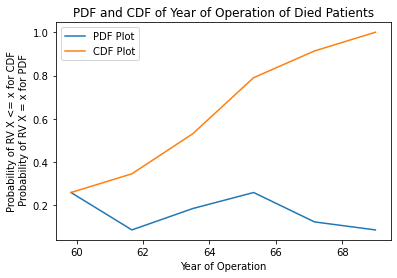

In [36]:
#died
counts, bin_edges = np.histogram(haberman_ds_died['Year of Operation'], bins=6, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Year of Operation')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Year of Operation of Died Patients')
plt.show();

### Observation(s):    

* Not much can be interpreted.

### 3) Number of Axillary Nodes

In [37]:
haberman_ds['Axillary Nodes'].min()

0

In [38]:
haberman_ds['Axillary Nodes'].max()

52

* Calculation of counts and bin edges:   

Axillary nodes = [0, ......, 52]   

i) For Bins = 10   

Min = 0  
Max = 52   
Bins = 10  
Width of each bin = (Max - Min)/Bins   
                       = (52-0)/10   
                       = 52/10 = 5.2    
                  
For simplicity, we round it off to 5. 

ii) For Bins = 20 

Width of each bin = (Max - Min)/Bins   
                       = (52-0)/20   
                       = 52/20 = 2.6    
        
For simplicity, we round it off to 2.5.              

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


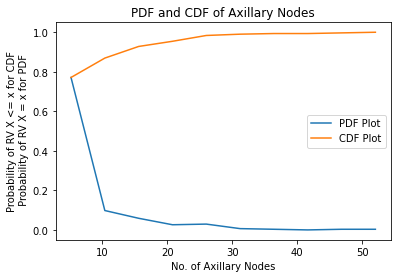

In [39]:
counts, bin_edges = np.histogram(haberman_ds['Axillary Nodes'], bins=10, density = True) 
                                
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('No. of Axillary Nodes')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Axillary Nodes')
plt.show();

### Observation(s):

* Around 95% of total patient's have axillary nodes less than or equal to 25.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


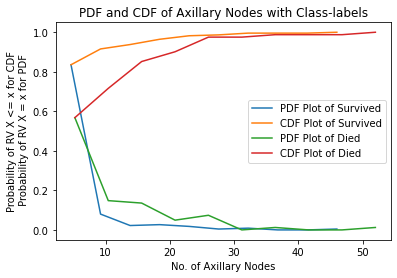

In [40]:
#total - with bins = 10 

#survived
counts, bin_edges = np.histogram(haberman_ds_survived['Axillary Nodes'], bins=10, density = True) 
                                 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#died
counts, bin_edges = np.histogram(haberman_ds_died['Axillary Nodes'], bins=10, density = True) 
                                
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('No. of Axillary Nodes')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot of Survived', 'CDF Plot of Survived',
           'PDF Plot of Died', 'CDF Plot of Died'])
plt.title('PDF and CDF of Axillary Nodes with Class-labels')
plt.show();

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


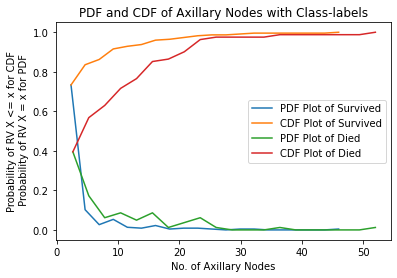

In [41]:
#total - with bins = 20 

#survived
counts, bin_edges = np.histogram(haberman_ds_survived['Axillary Nodes'], bins=20, density = True) 
                                 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#died
counts, bin_edges = np.histogram(haberman_ds_died['Axillary Nodes'], bins=20, density = True) 
                                
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('No. of Axillary Nodes')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot of Survived', 'CDF Plot of Survived',
           'PDF Plot of Died', 'CDF Plot of Died'])
plt.title('PDF and CDF of Axillary Nodes with Class-labels')
plt.show();

### Observation(s):     

* The PDF's of both the class-label's are overlapping. Not much can be drawn out of this plot. A rough approximation will not be accurate. So, better to avoid such approximation's. 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


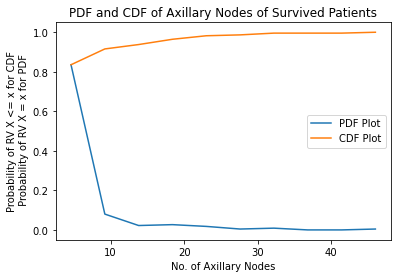

In [42]:
#number of positive axillary nodes detected

#survived
counts, bin_edges = np.histogram(haberman_ds_survived['Axillary Nodes'], bins=10, density = True) 
                                 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('No. of Axillary Nodes')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Axillary Nodes of Survived Patients')
plt.show();

### Observation(s):    

* From the PDF of bin 0.0 to 4.6, it can be seen that about 83% of survived patient's have axillary nodes less than 4.6.
* 90% of patient's who had survived have axillary nodes less than 10.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


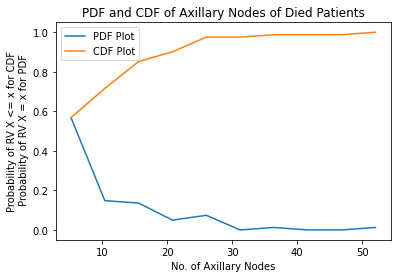

In [43]:
#died
counts, bin_edges = np.histogram(haberman_ds_died['Axillary Nodes'], bins=10, density = True) 
                                
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('No. of Axillary Nodes')
plt.ylabel('Probability of RV X <= x for CDF\n Probability of RV X = x for PDF')
plt.legend(['PDF Plot', 'CDF Plot'])
plt.title('PDF and CDF of Axillary Nodes of Died Patients')
plt.show();

### Observation(s):     

* Almost 98% of patient's who had died have axillary nodes less than 25 (0 to 24).
* 90% of patient's who had died have axillary nodes less than 21 (0 to 20).
* 83% of patient's who had died have axillary nodes less than or equal to 15.
* Almost 63% of patient's who had died have axillary nodes less than or equal to 10.   
* Small amount of patient's who have died have axillary nodes between 15.6 to 52.0. 

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


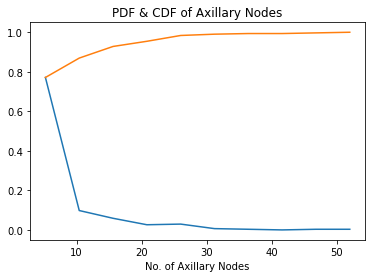

In [44]:
#total

counts, bin_edges = np.histogram(haberman_ds['Axillary Nodes'], bins=10, density = True) 
                                 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel('No. of Axillary Nodes')
plt.title('PDF & CDF of Axillary Nodes')
plt.show();

### Observation(s):    

* From the PDF of the bin 0.0 to 5.2, it can be seen that about 77% of patient's have axillary nodes less than or equal to 5. 
* Almost 85% of patient's have axillary nodes less than or equal to 10.
* 90% of patient's have axillary nodes less than or equal to 15.

### Overall Conclusion(s) of PDF's and CDF's:

* 1) There is a significant amount of overlap of data-points from both classes.
* 2) Probability Density Function and Cumulative Distribution Function of individual features does not help much in separating/differentiating the two class-labels.

* 3) No single feature is useful for accurate Classification. If we have to pick one feature which can be of little help, we can choose Axillary nodes (but with less accuracy).

In [45]:
############################################################################

### Box-Plot's

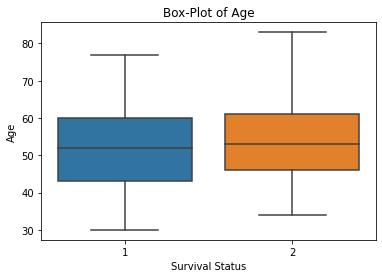

In [46]:
sns.boxplot(x='Survival Status',y='Age', data=haberman_ds)
plt.title('Box-Plot of Age')
plt.show()

### Observation(s):

* 50% of patient's who had survived are between the age of 42 and 60.
* Only 25% of patient's who had died fall below the age of 45 and 75% are above the age of 45.

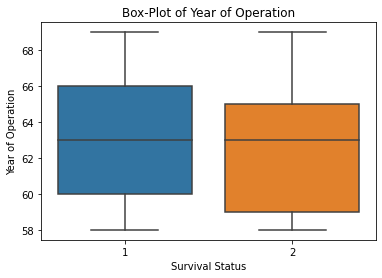

In [47]:
sns.boxplot(x='Survival Status',y='Year of Operation', data=haberman_ds)
plt.title('Box-Plot of Year of Operation')
plt.show()

### Observation(s):

* About 50% of patient's who had survived (class-label '1') fall between the years 1960 and 1966. 
* About 50% of patient's who had died fall between the years 1959 and 1965.
* only 25% of patient's died after the year 1965.

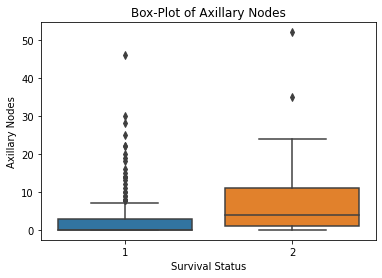

In [48]:
sns.boxplot(x='Survival Status',y='Axillary Nodes', data=haberman_ds)
plt.title('Box-Plot of Axillary Nodes')
plt.show()

### Observation(s):

* From the above box-plot of axillary nodes, it is evident that around 75% of survived patient's have axillary nodes between 0 and 2.
* About 50% of died patient's have axillary nodes between 1 and 11.
* In case of died patient's, it looks like around 35% have axillary nodes between 0 and 2, and the remaining about 65% have axillary nodes more than 2.   

In [49]:
############################################################################

### Violin-Plot's

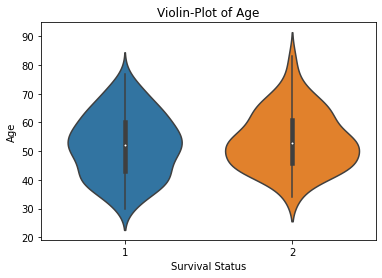

In [50]:
sns.violinplot(x='Survival Status',y='Age', data=haberman_ds)
plt.title('Violin-Plot of Age')
plt.show()

### Observation(s):

* For survived patient's, it is almost uniformly distributed between 30 and 70.
* The denser region for died patient's is between the age group of 40 and 70.

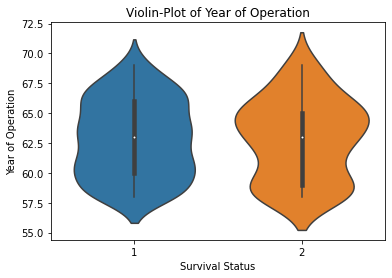

In [51]:
sns.violinplot(x='Survival Status',y='Year of Operation', data=haberman_ds)
plt.title('Violin-Plot of Year of Operation')
plt.show()

### Observation(s):

* For survived patient's, it is almost uniformly distributed between the year's '57.5 and '68.5.
* The denser region for died patient's are between:   
i) '57.5 and '60  
ii) '62.5 and '67.5

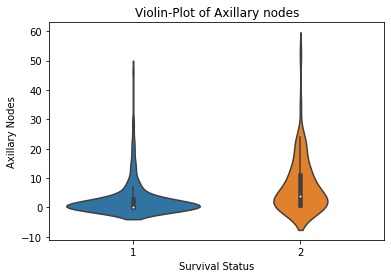

In [52]:
sns.violinplot(x='Survival Status',y='Axillary Nodes', data=haberman_ds)
plt.title('Violin-Plot of Axillary nodes')
plt.show()

### Observation(s):   

* The denser region for survived patient's falls between 0 and 2 (around 75%).
* The denser region for died patient's falls between 0 and 11.

In [53]:
############################################################################

## 1.4 Bi-Variate Analysis

### 2-D Scatter Plot's

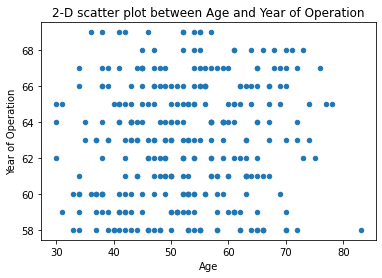

In [54]:
haberman_ds.plot(kind='scatter', x='Age', y='Year of Operation') ;
plt.title('2-D scatter plot between Age and Year of Operation')
plt.show()

### Observation(s):    
* Not much can be interpreted.

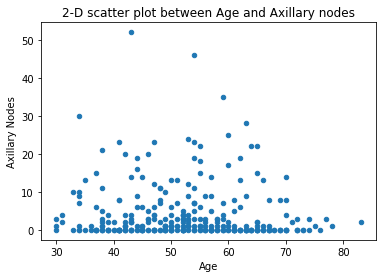

In [55]:
haberman_ds.plot(kind='scatter', x='Age', y='Axillary Nodes') ;
plt.title('2-D scatter plot between Age and Axillary nodes')
plt.show()

### Observation(s):    
* Almost all of the data-points have the number of axillary nodes between 0 to 30 (excluding outlier's).

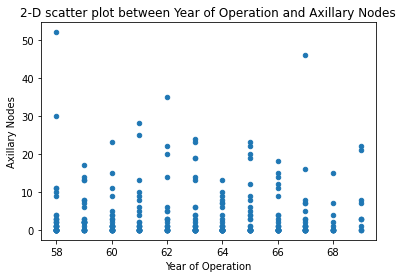

In [56]:
haberman_ds.plot(kind='scatter', x='Year of Operation', y='Axillary Nodes') ;
plt.title('2-D scatter plot between Year of Operation and Axillary Nodes')
plt.show()

### Observation(s):    
* Almost all of the data-points have the number of positive axillary nodes between 0 to 30 (excluding outlier's).

## 2-D Scatter Plot's with Colour-coded Class-label

### 1) Age and Year of Operation

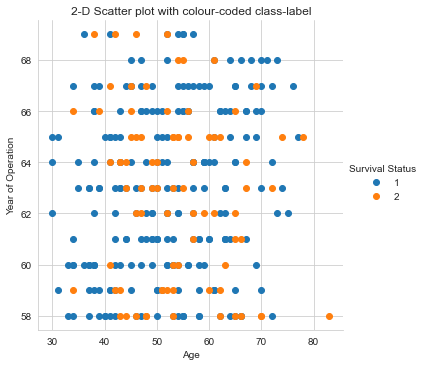

In [57]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(plt.scatter, "Age", "Year of Operation") \
   .add_legend();
plt.title('2-D Scatter plot with colour-coded class-label')
plt.show();


### Observation(s):    
* Separating the two class-labels from each other is not possible because of huge over-lap.


### 2) Age and Axillary Nodes

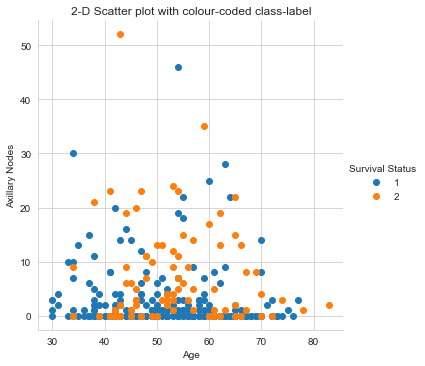

In [58]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(plt.scatter, "Age", "Axillary Nodes") \
   .add_legend();
plt.title('2-D Scatter plot with colour-coded class-label')
plt.show();

### Observation(s):     
* Separating the two class-labels from each other is not possible because of huge over-lap.

* Most of the orange points (Class-label '2'), i.e, people who had died fall between the age value of 40 to 70.


### 3) Year of Operation and Axillary Nodes

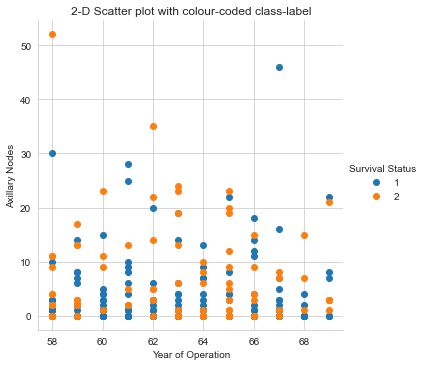

In [59]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman_ds, hue="Survival Status", height=5) \
   .map(plt.scatter, "Year of Operation", "Axillary Nodes") \
   .add_legend();
plt.title('2-D Scatter plot with colour-coded class-label')
plt.show();

### Observation(s):    
* Separating the two class-labels from each other is not possible because of huge over-lap.

### Overall Conclusion(s) of 2-D Scatter plot's:
* No particular combination of features is useful for Classification.
* Separation of data-points of people who had survived from the surgery (blue points) from the people who had died (orange points) is impossible from the above 2-D Scatter Plots since there is a significant overlap.
* Therefore, classifying whether they belong to class-label '1' or class-label '2' cannot be achieved.

## Pair-Plot's

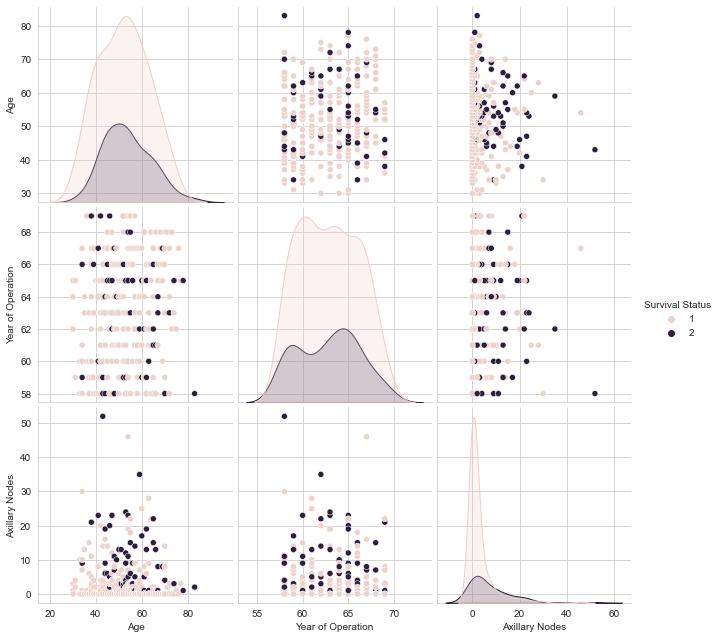

In [60]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman_ds, hue="Survival Status", height=3);
plt.show()

### Conclusion(s) of Pair-plot's:
 
* No particular combination of features is useful for Classification.
* Massive over-lap of data-points from Class-label '1' and Class-label '2'. The corresponding data-points cannot be linearly seperated from each other. Hence,  accurately classifying whether they belong to Class-label '1' or Class-label '2' is not possible from the above pair-plots. 

In [61]:
############################################################################

## Final Conclusion(s):

* From analysing the different types of plot's, we can say that there is a significant amount of overlap of data-points from both the class label's.   


* Histograms, 2-D Scatter-plot's, Pair-plot's do not help much in separating/distinguishing the class label's.  


* The plots of CDF's and PDF's give us some idea of the percentage statistics of data-points belonging to respective feature variables and class label's.


* From the observations of box-plot and violin-plot of Axillary nodes, we can consider 'Axillary Nodes' as an important feature for Classification. 


* From this particular observations, the threshold limit can be set as follows: 

    i) Patient's who have axillary nodes less than 3 (between 0 and 2), can be classified as Survived Patient's belonging to Class-label '1'. In this case, the accuracy can be around 75%.        
    ii) Patient's who have axillary nodes as 3 or more, can be classified as Died Patient's belonging to Class-label '2'. In this case, the accuracy can be around 65%.   


* Simple 'if...else' condition can be implemented for Classification based on the number of axillary nodes, which is: 

if (axillary nodes) < 3: class-label 1
           
else: class-label 2 
        

In [62]:
############################################################################